In [4]:
pip install scipy matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
import scipy.io

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract the first element to explore its structure
instances = mat['imdb'][0, 0]

# Print all field names
print("Fields available in the dataset: ", instances.dtype.names)

# If 'age' is not there, look for a similarly named field


Fields available in the dataset:  ('dob', 'photo_taken', 'full_path', 'gender', 'name', 'face_location', 'face_score', 'second_face_score', 'celeb_names', 'celeb_id')


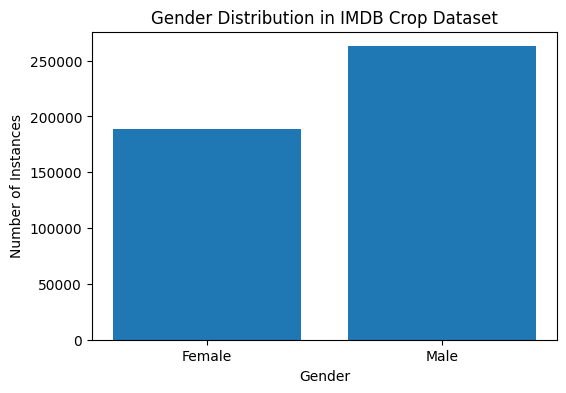

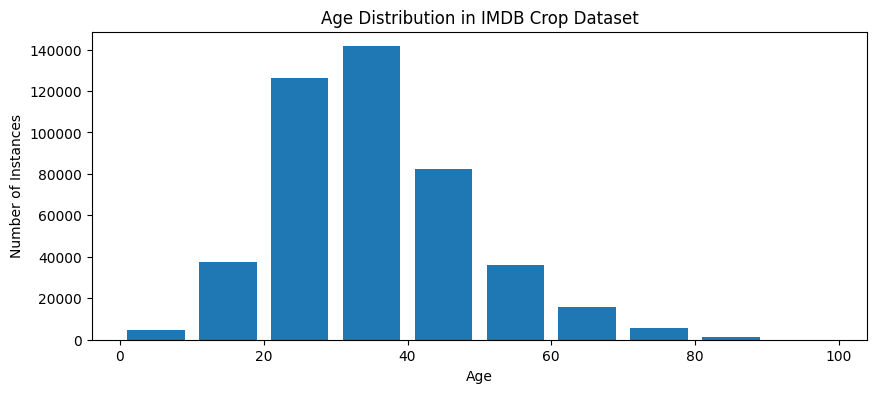

In [ ]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
gender_data = instances['gender'][0]
dob_data = instances['dob'][0]  # Date of birth (Matlab serial date number)
photo_taken_data = instances['photo_taken'][0]  # Year when photo was taken

# Convert Matlab serial date number to Python datetime
dob_data_converted = []
for dob in dob_data:
    try:
        # Adjust for the difference between MATLAB and Python date number systems
        python_date = dt.datetime.fromordinal(int(dob) + 366)
        dob_data_converted.append(python_date)
    except ValueError:
        # Handle invalid dates
        dob_data_converted.append(dt.datetime(1, 1, 1))  # Placeholder for invalid dates

# Calculate age
age_data = photo_taken_data - np.array([dob.year for dob in dob_data_converted])

# Filter out invalid data
valid_indices = (gender_data >= 0) & (age_data > 0) & (age_data < 100)
filtered_genders = gender_data[valid_indices]
filtered_ages = age_data[valid_indices]

# Plotting gender distribution
plt.figure(figsize=(6, 4))
plt.hist(filtered_genders, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Instances')
plt.title('Gender Distribution in IMDB Crop Dataset')
plt.show()

# Plotting age distribution
plt.figure(figsize=(10, 4))
plt.hist(filtered_ages, bins=range(0, 101, 10), rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Instances')
plt.title('Age Distribution in IMDB Crop Dataset')
plt.show()


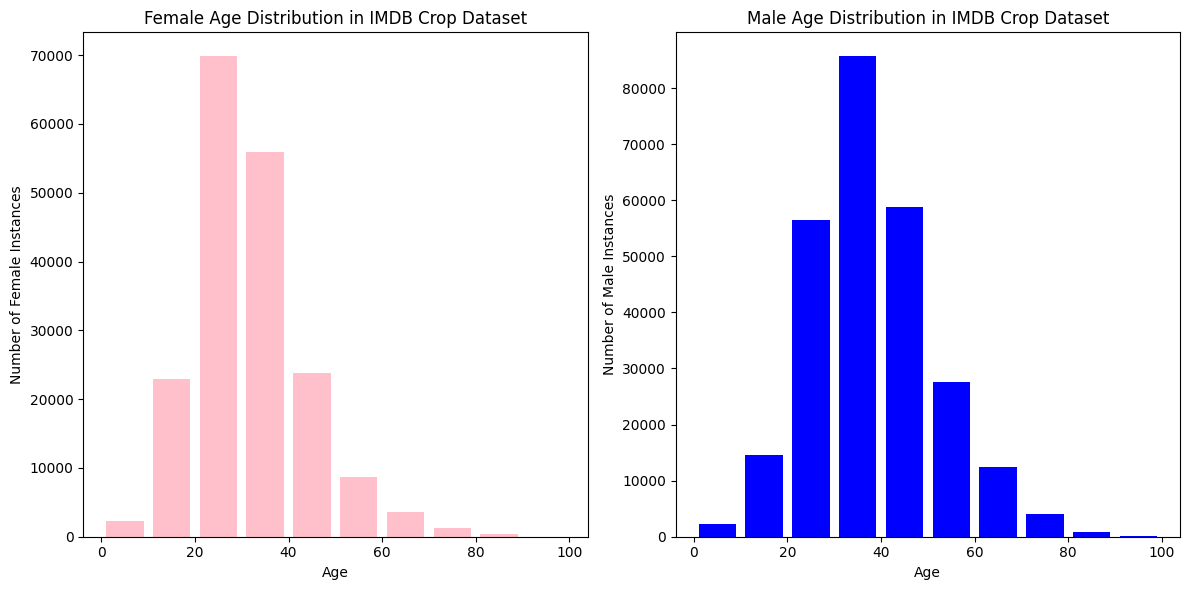

In [2]:
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

# Load the imdb.mat file (replace with your file path)
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
gender_data = instances['gender'][0]  # 0: Female, 1: Male
dob_data = instances['dob'][0]  # Date of birth (Matlab serial date number)
photo_taken_data = instances['photo_taken'][0]  # Year when photo was taken

# Convert Matlab serial date number to Python datetime
dob_data_converted = [dt.datetime.fromordinal(int(dob) + 366) if dob > 0 else dt.datetime(1, 1, 1) for dob in dob_data]

# Calculate age
age_data = photo_taken_data - np.array([dob.year for dob in dob_data_converted])

# Filter out invalid data
valid_indices = (gender_data >= 0) & (age_data > 0) & (age_data < 100)
filtered_genders = gender_data[valid_indices]
filtered_ages = age_data[valid_indices]

# Separate data by gender
ages_female = filtered_ages[filtered_genders == 0]
ages_male = filtered_ages[filtered_genders == 1]

# Plotting age distribution per gender
plt.figure(figsize=(12, 6))

# Female age distribution
plt.subplot(1, 2, 1)
plt.hist(ages_female, bins=range(0, 101, 10), rwidth=0.8, color='pink')
plt.xlabel('Age')
plt.ylabel('Number of Female Instances')
plt.title('Female Age Distribution in IMDB Crop Dataset')

# Male age distribution
plt.subplot(1, 2, 2)
plt.hist(ages_male, bins=range(0, 101, 10), rwidth=0.8, color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Male Instances')
plt.title('Male Age Distribution in IMDB Crop Dataset')

plt.tight_layout()
plt.show()


In [10]:
pip install numpy matplotlib scipy scikit-learn

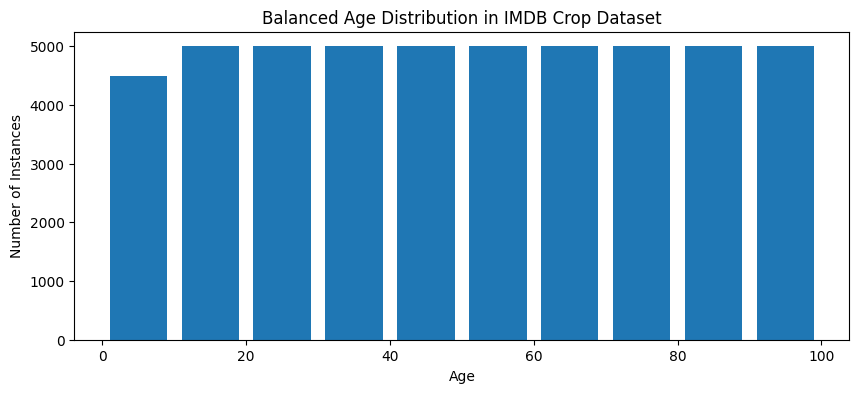

In [12]:
import scipy.io
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
dob_data = instances['dob'][0]  # Date of birth (Matlab serial date number)
photo_taken_data = instances['photo_taken'][0]  # Year when photo was taken

# Convert Matlab serial date number to Python datetime and calculate age
dob_data_converted = [dt.datetime.fromordinal(int(dob) + 366) if dob > 366 else dt.datetime(1, 1, 1) for dob in dob_data]
age_data = photo_taken_data - np.array([dob.year for dob in dob_data_converted])

# Filter and create a DataFrame
data = pd.DataFrame({'age': age_data})
filtered_data = data[(data['age'] > 0) & (data['age'] < 100)]

# Balance the age distribution
balanced_data = pd.DataFrame()
for age in range(1, 100):
    group = filtered_data[filtered_data['age'] == age]
    resampled_group = resample(group, replace=True, n_samples=500, random_state=123)  # Adjust n_samples as needed
    balanced_data = pd.concat([balanced_data, resampled_group])

# Plot the balanced age distribution
plt.figure(figsize=(10, 4))
plt.hist(balanced_data['age'], bins=range(0, 101, 10), rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Instances')
plt.title('Balanced Age Distribution in IMDB Crop Dataset')
plt.show()


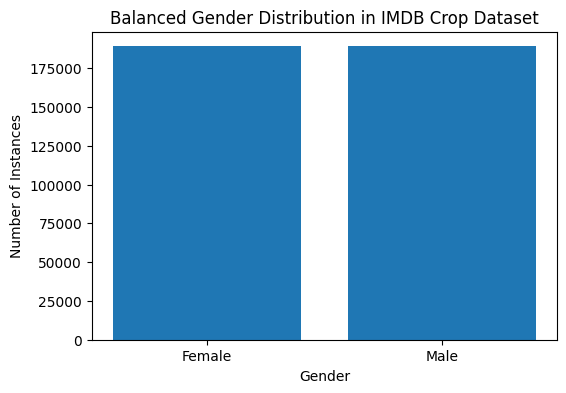

In [14]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
gender_data = instances['gender'][0]

# Filter out invalid gender data
valid_indices = gender_data >= 0
filtered_gender_data = gender_data[valid_indices]

# Create a DataFrame
data = pd.DataFrame({'gender': filtered_gender_data})

# Balance the gender distribution
male_data = data[data['gender'] == 1]
female_data = data[data['gender'] == 0]

minority_class_size = min(len(male_data), len(female_data))
balanced_male = resample(male_data, replace=True, n_samples=minority_class_size, random_state=123)
balanced_female = resample(female_data, replace=True, n_samples=minority_class_size, random_state=123)

balanced_data = pd.concat([balanced_male, balanced_female])

# Plot the balanced gender distribution
plt.figure(figsize=(6, 4))
plt.hist(balanced_data['gender'], bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Instances')
plt.title('Balanced Gender Distribution in IMDB Crop Dataset')
plt.show()


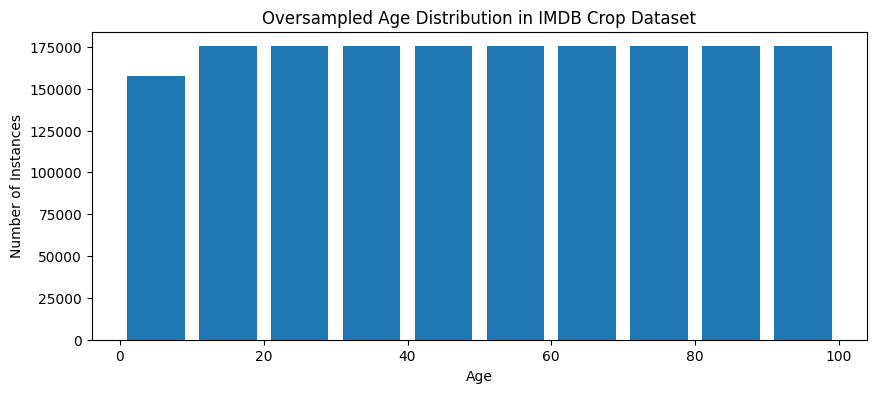

In [15]:
import scipy.io
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
dob_data = instances['dob'][0]  # Date of birth (Matlab serial date number)
photo_taken_data = instances['photo_taken'][0]  # Year when photo was taken

# Convert Matlab serial date number to Python datetime and calculate age
dob_data_converted = [dt.datetime.fromordinal(int(dob) + 366) if dob > 366 else dt.datetime(1, 1, 1) for dob in dob_data]
age_data = photo_taken_data - np.array([dob.year for dob in dob_data_converted])

# Filter and create a DataFrame
data = pd.DataFrame({'age': age_data})
filtered_data = data[(data['age'] > 0) & (data['age'] < 100)]

# Find the most represented age group size
max_size = filtered_data['age'].value_counts().max()

# Oversample each age group
oversampled_data = filtered_data.groupby('age').apply(lambda x: resample(x, replace=True, n_samples=max_size, random_state=123)).reset_index(drop=True)

# Plot the oversampled age distribution
plt.figure(figsize=(10, 4))
plt.hist(oversampled_data['age'], bins=range(0, 101, 10), rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Instances')
plt.title('Oversampled Age Distribution in IMDB Crop Dataset')
plt.show()


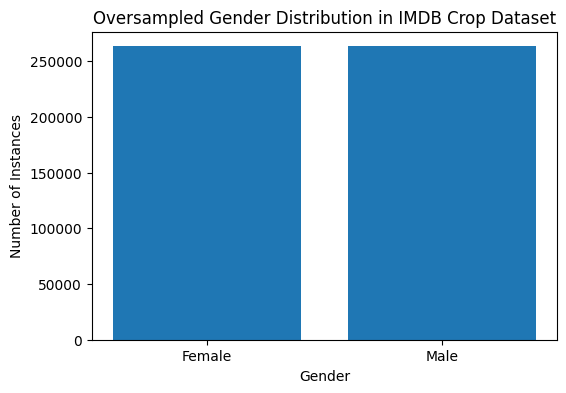

In [16]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
gender_data = instances['gender'][0]

# Filter out invalid gender data
valid_indices = gender_data >= 0
filtered_gender_data = gender_data[valid_indices]

# Create a DataFrame
data = pd.DataFrame({'gender': filtered_gender_data})

# Find the most represented gender size
max_size = data['gender'].value_counts().max()

# Oversample the minority gender
oversampled_male = resample(data[data['gender'] == 1], replace=True, n_samples=max_size, random_state=123)
oversampled_female = resample(data[data['gender'] == 0], replace=True, n_samples=max_size, random_state=123)

# Combine back to a single oversampled dataset
oversampled_data = pd.concat([oversampled_male, oversampled_female])

# Plot the oversampled gender distribution
plt.figure(figsize=(6, 4))
plt.hist(oversampled_data['gender'], bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Instances')
plt.title('Oversampled Gender Distribution in IMDB Crop Dataset')
plt.show()


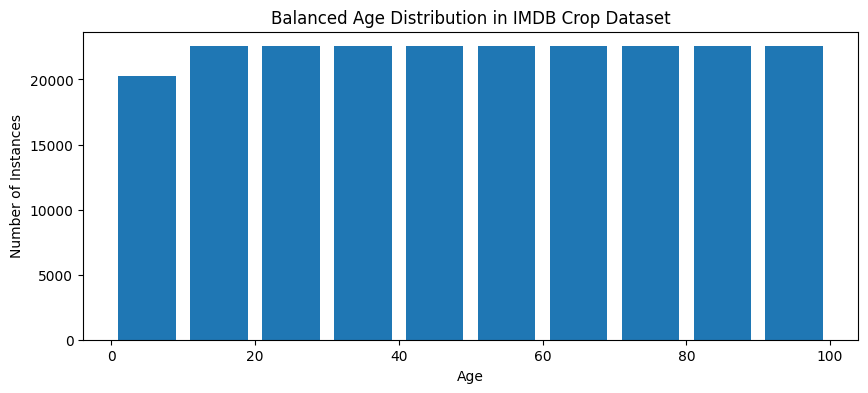

In [17]:
import scipy.io
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
dob_data = instances['dob'][0]  # Date of birth (Matlab serial date number)
photo_taken_data = instances['photo_taken'][0]  # Year when photo was taken

# Convert Matlab serial date number to Python datetime and calculate age
dob_data_converted = [dt.datetime.fromordinal(int(dob) + 366) if dob > 366 else dt.datetime(1, 1, 1) for dob in dob_data]
age_data = photo_taken_data - np.array([dob.year for dob in dob_data_converted])

# Filter and create a DataFrame
data = pd.DataFrame({'age': age_data})
filtered_data = data[(data['age'] > 0) & (data['age'] < 100)]

# Determine the target number of samples for each age group (based on median)
target_samples_per_age = int(filtered_data['age'].value_counts().median())

# Balance the age distribution
balanced_data = pd.DataFrame()
for age in range(1, 100):
    group = filtered_data[filtered_data['age'] == age]
    resampled_group = resample(group, replace=len(group) < target_samples_per_age, n_samples=target_samples_per_age, random_state=123)
    balanced_data = pd.concat([balanced_data, resampled_group])

# Plot the balanced age distribution
plt.figure(figsize=(10, 4))
plt.hist(balanced_data['age'], bins=range(0, 101, 10), rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Instances')
plt.title('Balanced Age Distribution in IMDB Crop Dataset')
plt.show()


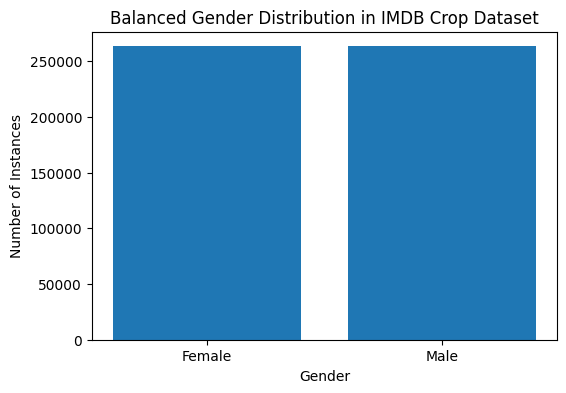

In [19]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import resample

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
gender_data = instances['gender'][0]

# Filter out invalid gender data
valid_indices = gender_data >= 0
filtered_gender_data = gender_data[valid_indices]

# Create a DataFrame
data = pd.DataFrame({'gender': filtered_gender_data})

# Balance the gender distribution
male_data = data[data['gender'] == 1]
female_data = data[data['gender'] == 0]

# Determine the target number of samples for each gender
target_samples = max(len(male_data), len(female_data))

# Resample each gender group
balanced_male = resample(male_data, replace=len(male_data) < target_samples, n_samples=target_samples, random_state=123)
balanced_female = resample(female_data, replace=len(female_data) < target_samples, n_samples=target_samples, random_state=123)

balanced_data = pd.concat([balanced_male, balanced_female])

# Plot the balanced gender distribution
plt.figure(figsize=(6, 4))
plt.hist(balanced_data['gender'], bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Instances')
plt.title('Balanced Gender Distribution in IMDB Crop Dataset')
plt.show()


In [20]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/235.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/235.6 kB ? eta -:--:--
   ----- --------------------------------- 30.7/235.6 kB 445.2 kB/s eta 0:00:01
   ---------- ---------------------------- 61.4/235.6 kB 656.4 kB/s eta 0:00:01
   ----------------------------- ---------- 174.1/235.6 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 235.6/235.6 kB 1.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


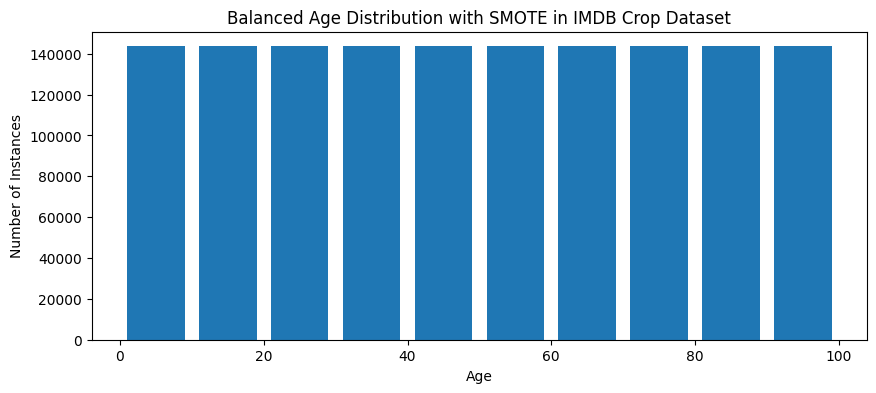

In [21]:
import scipy.io
import numpy as np
import datetime as dt
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
dob_data = instances['dob'][0]
photo_taken_data = instances['photo_taken'][0]

# Convert Matlab serial date number to Python datetime and calculate age
dob_data_converted = [dt.datetime.fromordinal(int(dob) + 366) if dob > 366 else dt.datetime(1, 1, 1) for dob in dob_data]
age_data = photo_taken_data - np.array([dob.year for dob in dob_data_converted])

# Filter data
valid_ages = (age_data > 0) & (age_data < 100)
age_data = age_data[valid_ages]

# Discretize age into bins
age_bins = np.digitize(age_data, bins=range(0, 101, 10))

# Apply SMOTE
smote = SMOTE(random_state=42)
age_data_resampled, age_bins_resampled = smote.fit_resample(age_data.reshape(-1, 1), age_bins)

# Plot the balanced age distribution
plt.figure(figsize=(10, 4))
plt.hist(age_data_resampled, bins=range(0, 101, 10), rwidth=0.8)
plt.xlabel('Age')
plt.ylabel('Number of Instances')
plt.title('Balanced Age Distribution with SMOTE in IMDB Crop Dataset')
plt.show()


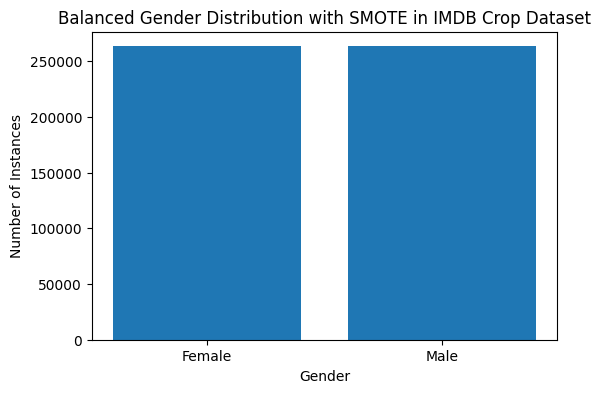

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the imdb.mat file
mat = scipy.io.loadmat('C:\\Users\\mevin\\Downloads\\imdb_crop\\imdb.mat')

# Extract data
instances = mat['imdb'][0, 0]
gender_data = instances['gender'][0]

# Filter out invalid gender data
valid_gender = gender_data >= 0
gender_data = gender_data[valid_gender]

# Apply SMOTE
smote = SMOTE(random_state=42)
gender_data_resampled, _ = smote.fit_resample(gender_data.reshape(-1, 1), gender_data)

# Plot the balanced gender distribution
plt.figure(figsize=(6, 4))
plt.hist(gender_data_resampled, bins=[-0.5, 0.5, 1.5], rwidth=0.8)
plt.xticks([0, 1], ['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Number of Instances')
plt.title('Balanced Gender Distribution with SMOTE in IMDB Crop Dataset')
plt.show()
